In [1]:
pip install streamlit

In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DataDir = r"C:\Users\Batsalle\Dev\Image-Classification-Streamlit\images"

Categories = ['cardboard','glass','metal','paper','plastic','trash']

for category in Categories:
  class_num = Categories.index(category) #label encoding
  path = os.path.join(DataDir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


In [5]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

<BarContainer object of 6 artists>

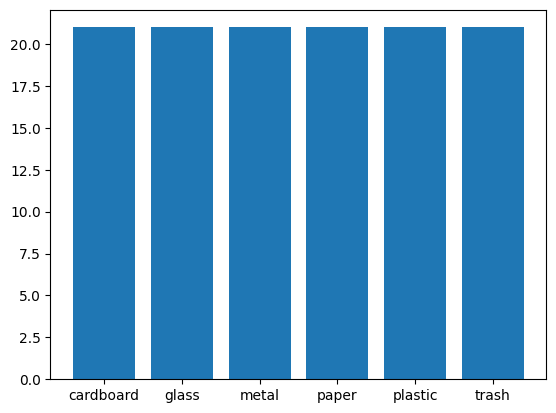

In [7]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc= svm.SVC(probability = True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [10]:
y_pred = clf.predict(x_test)
y_pred

array([5, 1, 5, 3, 2, 3, 1, 4, 3, 4, 3, 5, 1, 3, 3, 1, 0, 3, 0, 5, 5, 4,
       2, 2, 3, 1, 1, 4, 5, 5, 3, 1, 2, 0, 0, 2, 1, 1])

Text(0, 0.5, 'Predictions ')

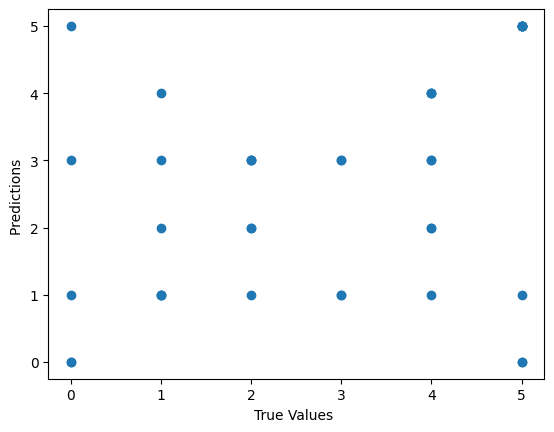

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
accuracy_score(y_pred,y_test)

0.47368421052631576

In [14]:
confusion_matrix(y_pred,y_test)

array([[2, 0, 0, 0, 0, 2],
       [1, 3, 1, 2, 1, 1],
       [0, 1, 2, 0, 2, 0],
       [1, 1, 3, 2, 2, 0],
       [0, 1, 0, 0, 3, 0],
       [1, 0, 0, 0, 0, 6]], dtype=int64)

In [15]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [16]:
model = pickle.load(open('img_model.p','rb'))